# Exploring Global Temperature Trends - A Comparative Analysis with Singapore
---------
## Project Objective:
To analyze and compare the short-term historical temperature trends between global locations and Singapore, focusing on the time range from August 29, 2023, to January 8, 2024. Utilizing a dataset encompassing temperature, air quality, wind speed, and other relevant environmental factors, the aim is to identify patterns, variations, and potential correlations, providing insights into how Singapore's climate compares to global temperature trends during this specific timeframe.

## Key Objectives:
**1.	Global Temperature Trend Analysis:** Examine the historical temperature trends on a global scale within the limited time range. Identify short-term patterns and variations in temperature across different global locations.                                                          
**2.	Singapore Climate Investigation:** Explore the specific climate patterns and trends in Singapore during the time period. Highlight unique characteristics of Singapore's climate within this short-term context.                                         
**3.	Comparative Climate Study for the Specified Timeframe:** Conduct a detailed comparison between global temperature trends and those observed in Singapore. Uncover any short-term similarities, differences, and notable deviations.                                         
**4.	Short-term Environmental Factors Correlation:** Investigate potential correlations between temperature and other key environmental factors, such as air quality and wind speed, during the short-term period.                                         
**5.	Data Visualization for Short-term Insights:** Utilize effective data visualization techniques to visually communicate short-term trends and patterns within the specified timeframe, enhancing the interpretability of the analysis.

## Methods and Techniques:
**1.	Data Cleaning and Preparation:** Handle missing values, ensure data consistency, and convert data types if needed.                                         
**2.	Exploratory Data Analysis (EDA):** Explore data distributions, identify trends, and uncover patterns.                                         
**3.	Time Series Analysis:** Examine how temperature varies over time for both global locations and Singapore.                                         
**4.	Statistical Analysis:** Use statistical measures to quantify similarities or differences in temperature trends.                                         
**5.	Data Visualization:** Create visualizations (line charts, scatter plots, etc.) to present insights clearly.                                         
**6.	Correlation Analysis:** Explore relationships between temperature and other environmental variables.  
**7.	Machine Learning:** Utilizing the ARIMA model from the statsmodels library for predicting future temperature trends

## Tools and Technologies:
**1.	Programming Language:** Python (utilizing libraries such as Pandas, NumPy, Matplotlib, Seaborn).          
**2.	Data Analysis:** Jupyter Notebooks for interactive and documented analysis.                  
**3.	Statistical Analysis:** SciPy and StatsModels for statistical tests.                            
**4.	Data Visualization:** Matplotlib and Seaborn for static visualizations, Plotly for interactive visualizations.

## Significance of project:
The significance of this project lies in its exploration of short-term global temperature trends and their comparison with the unique climate of Singapore during the specific timeframe from August 29, 2023, to January 8, 2024. By analyzing a diverse dataset encompassing temperature, air quality, wind speed, and other environmental variables, this study aims to uncover patterns, variations, and potential correlations, shedding light on how Singapore's climate aligns with or deviates from global temperature trends over this short duration. The insights gained from this analysis could have implications for understanding the dynamic nature of climate patterns, providing valuable information for local environmental planning, resource management, and contributing to the broader discourse on climate studies. Furthermore, the project showcases practical skills in data analysis, statistical methods, and data visualization, offering a tangible demonstration of the ability to derive meaningful conclusions from real-world data.

-----------------------------------------------------------------------------------
## Understand the Data
**1.** Examine the data columns and understand the information they contain.              
**2.** Identify which columns are relevant for the analysis.
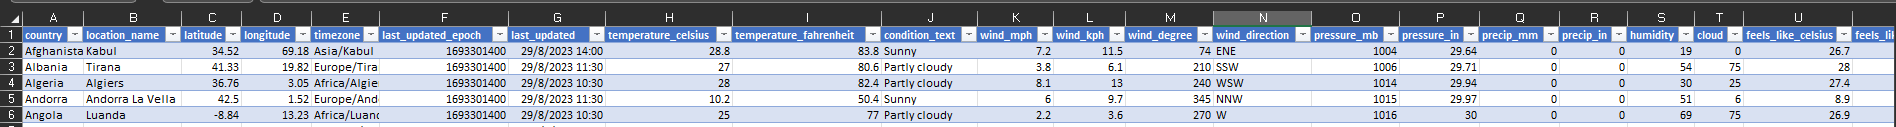

### Relevant Columns
| Country     | Location         | Last Updated      | Temperature (C) | Wind Speed (kph) | Pressure (mb) | Precipitation (mm) | Humidity (%) |
|-------------|------------------|-------------------|------------------|------------------|----------------|---------------------|--------------|
| Afghanistan | Kabul            | 29/8/2023 14:00  | 28.8             | 11.5             | 1004           | 0                   | 19           |
| Albania     | Tirana           | 29/8/2023 11:30  | 27               | 6.1              | 1006           | 0                   | 54           |
| Algeria     | Algiers          | 29/8/2023 10:30  | 28               | 13               | 1014           | 0                   | 30           |
| Andorra     | Andorra La Vella | 29/8/2023 11:30  | 10.2             | 9.7              | 1015           | 0                   | 51           |
| Angola      | Luanda           | 29/8/2023 10:30  | 25               | 3.6              | 1016           | 0                   | 69           |

---------------------

### Preparing the Environment
**Import Libraries**

Import required libraries such as:
- Pandas - Data Manipulation
- Matplotlib & Seaborn - Data Visualization
- Statsmodels - Statistical Modeling and Analysis



In [ ]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

**Read Dataset**                             
Read Dataset using ```pd.read_csv("dataset location")```

In [ ]:
# Read Dataset
data = pd.read_csv("C:\\Users\\Xin Cong\\Downloads\\Data Analyst Project\\GlobalWeatherRepository.csv")

---------------------

### Exploring the Data Set
**Display First 5 Rows**            
- Get a glimpse of the data            
- Using ```.head()```    

In [ ]:
print(data.head())

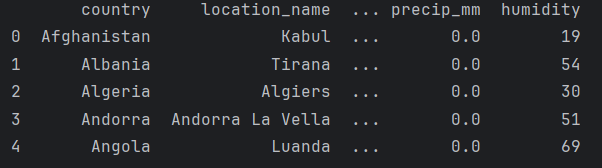
Since we only require the date where the data was collected, we can remove the time.
1) Use ```pd.to_datetime``` to convert the column to a datetime format.
2) Use ```.dt.date``` to extract out the date portion   aion)

In [ ]:
data['last_updated'] = pd.to_datetime(data['last_updated'], dayfirst=True)
data['last_updated'] = data['last_updated'].dt.date

**Get Summary Statistics**                       
- Provides summary statistics such as mean, standard deviation, etc.          
- Using ```.describe()```  

In [ ]:
print(data.describe())

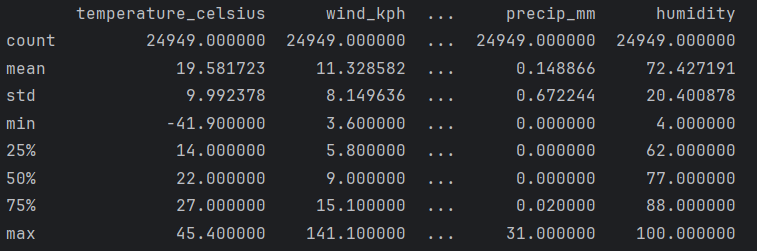

**Check Data Type and Missing Values**                       
- Provides an overview of the data types of each column and the number of non-null values.      
- Using ```.info()```

In [ ]:
print(data.info())

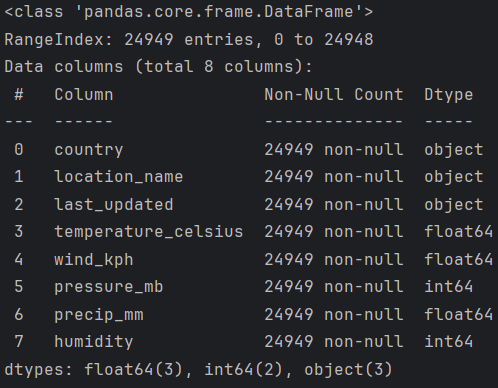

---------------------

### Data Cleaning
**Handling Missing Values**            
Firstly, check if there are any missing values using ```.isnull().sum()```   

In [ ]:
print(data.isnull().sum())

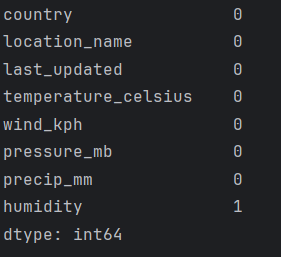                                  
Result shows that ```humidity``` contains 1 NULL value, hence proceed to drop the NULL value using ```.dropna()``` and check for NULL values again.   

In [ ]:
data = data.dropna()
print(data.isnull().sum())

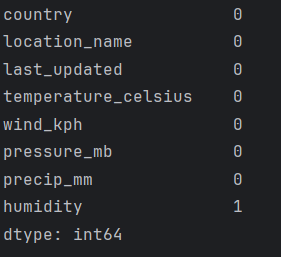                                   
**Check Data Consistency and Correctness**                                
Visually check for data consistency and correctness, especially in categorical columns such as ```country``` and ```location_name```, then address the issues identified.                      
Using ```.unique()```    

In [ ]:
print(data['country'].unique())
print(data['location_name'].unique())

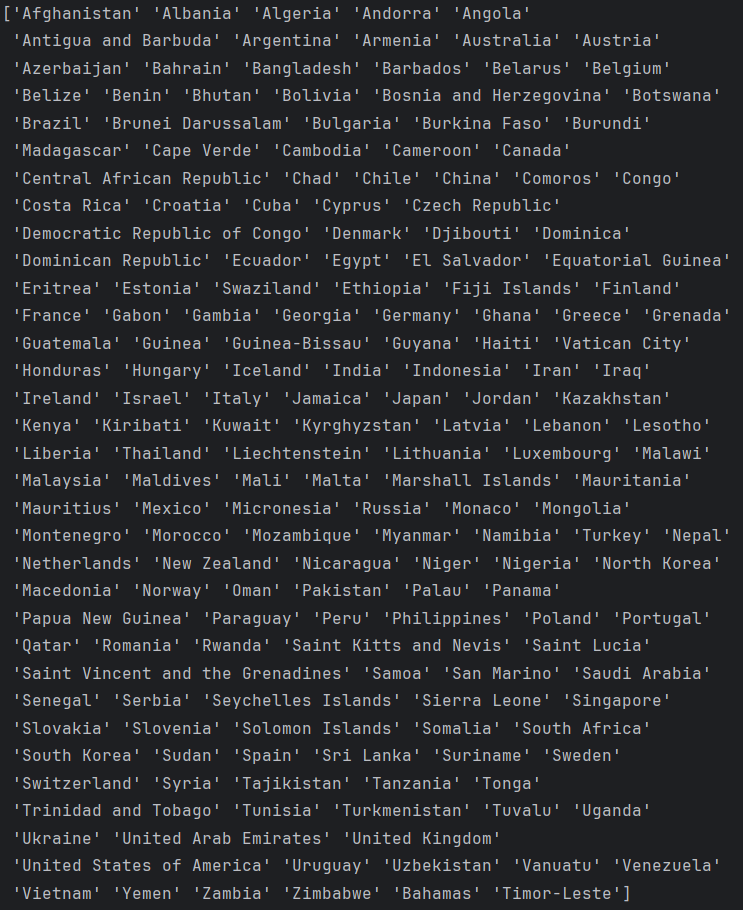                                        
**Split the Cleaned Datasets**                                        
Since we now have a clean dataset, split them into Global and Singapore as the project objective is to analyze the temperature trends between global locations and Singapore.                                                Create a subset for both global locations and Singapore. 

In [ ]:
# Create a subset for Global Locations
global_subset = data[data['country'] != 'Singapore'].reset_index()
# Create a subset for Singapore
singapore_subset = data[data['country'] == 'Singapore'].reset_index()

**Save the Cleaned Datasets**                                        
Save the cleaned datasets to a new file for further analysis.                              
Using ```.to_csv("path\\to\\save\\cleaned_dataset", index=False)```  

In [ ]:
global_subset.to_csv("C:\\Users\\Xin Cong\\Downloads\\Data Analyst Project\\GlobalSubset_Cleaned.csv", index=False)
singapore_subset.to_csv("C:\\Users\\Xin Cong\\Downloads\\Data Analyst Project\\SingaporeSubset_Cleaned.csv", index=False)

**Merge Countries in Global to get Mean of each variable**                    
Since we are comparing temperature trends of global and Singapore, we must merge countries in global.                                                                                     
1) Remove ```country``` and ```location_name``` using ```.drop(['country', 'location_name'], axis=1)```, where ```axis=1``` refers to columns and ```axis=0``` refers to rows.
2) Group Data by Date then Calcuate the Mean of each Variable using ```.groupby('last_updated').mean()```
3) Save the new Dataset to a new file using ```.to_csv("path\\to\\save\\new_dataset", index=False)```

In [ ]:
# Remove country and location_name
global_subset = global_subset.drop(['country', 'location_name'], axis=1)
# Group Data by Date and Calculate Mean of Variables
mean_global_subset = global_subset.groupby('last_updated').mean().reset_index()
# Save new Dataset to a new File
mean_global_subset.to_csv("C:\\Users\\Xin Cong\\Downloads\\Data Analyst Project\\meanGlobalSubset.csv", index=False)


---------------------

### Exploratory Data Analysis (EDA)
**Correlation between Environmental Factors**            
Firstly, we have to find out the correlations between environmental factors to uncover relationships and patterns that contribute to a comprehensive understanding of short-term historical temperature trends.                                                
1) Combine the data of Global and Singapore, using ```pd.concat```                  
2) Create a Correlation Heatmap, using ```matplotlib.pyplot``` and ```seaborn```

In [ ]:
# Combine both Global and Singapore data
combined_data = pd.concat([mean_global_subset, singapore_subset], ignore_index=True)
correlation_matrix_combined = combined_data[['temperature_celsius', 'wind_kph', 'pressure_mb', 'humidity', 'precip_mm']].corr()
# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_combined, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlation Heatmap: Combined Global and Singapore Data')
plt.show()

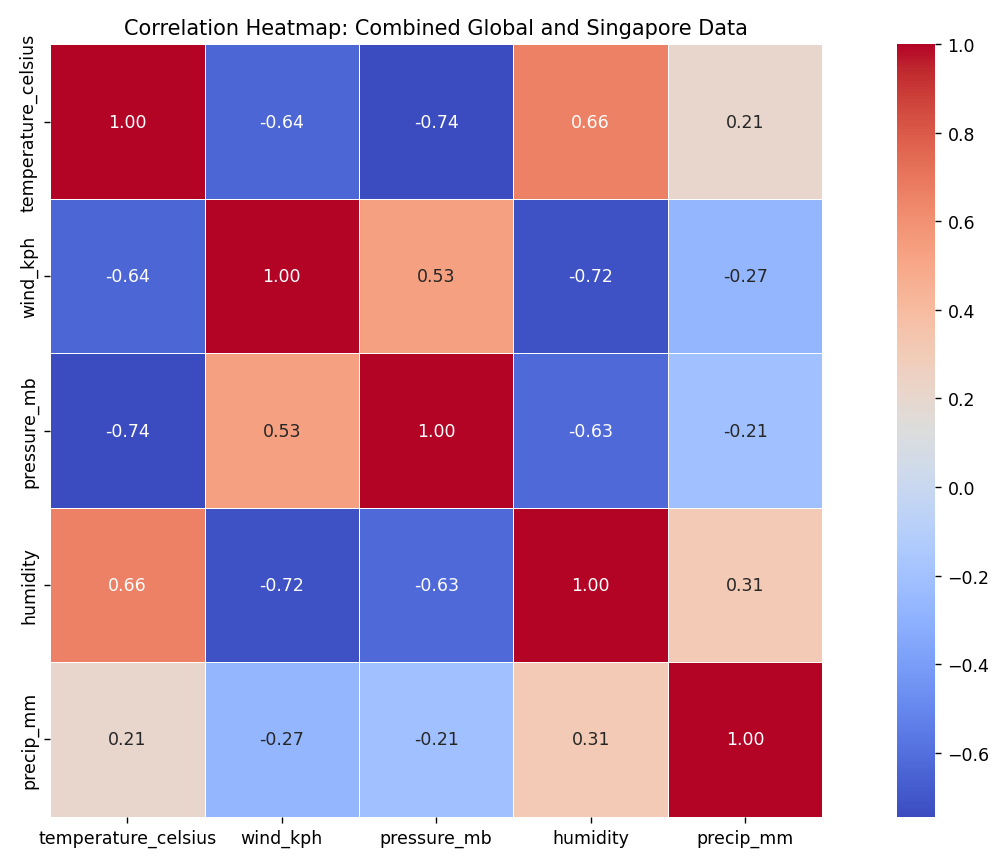                                                              From the heatmap, it is evident that:
- The correlation between temperature and pressure has a moderate to strong inverse relationship. As atmospheric pressure decreases, temperatures tend to rise, and vice versa.
- The correlation between windspeed and humidity indicates a moderate inverse relationship as well. Hence, higher wind speeds are associated with lower humidity levels.

**Temperature Trends of Global and Singapore**   

In [ ]:
plt.figure(figsize=(14, 6))
# Temperature trend for Global
sns.lineplot(x='last_updated', y='temperature_celsius', data=mean_global_subset, label='Global')
# Temperature trend for Singapore
sns.lineplot(x='last_updated', y='temperature_celsius', data=singapore_subset, label='Singapore')
# Set plot title and labels
plt.title('Temperature Trends Over Time: Global vs. Singapore')
plt.xlabel('Date and Time')
plt.ylabel('Temperature (°C)')
# Set legend and display Line Plot
plt.legend()
plt.show()

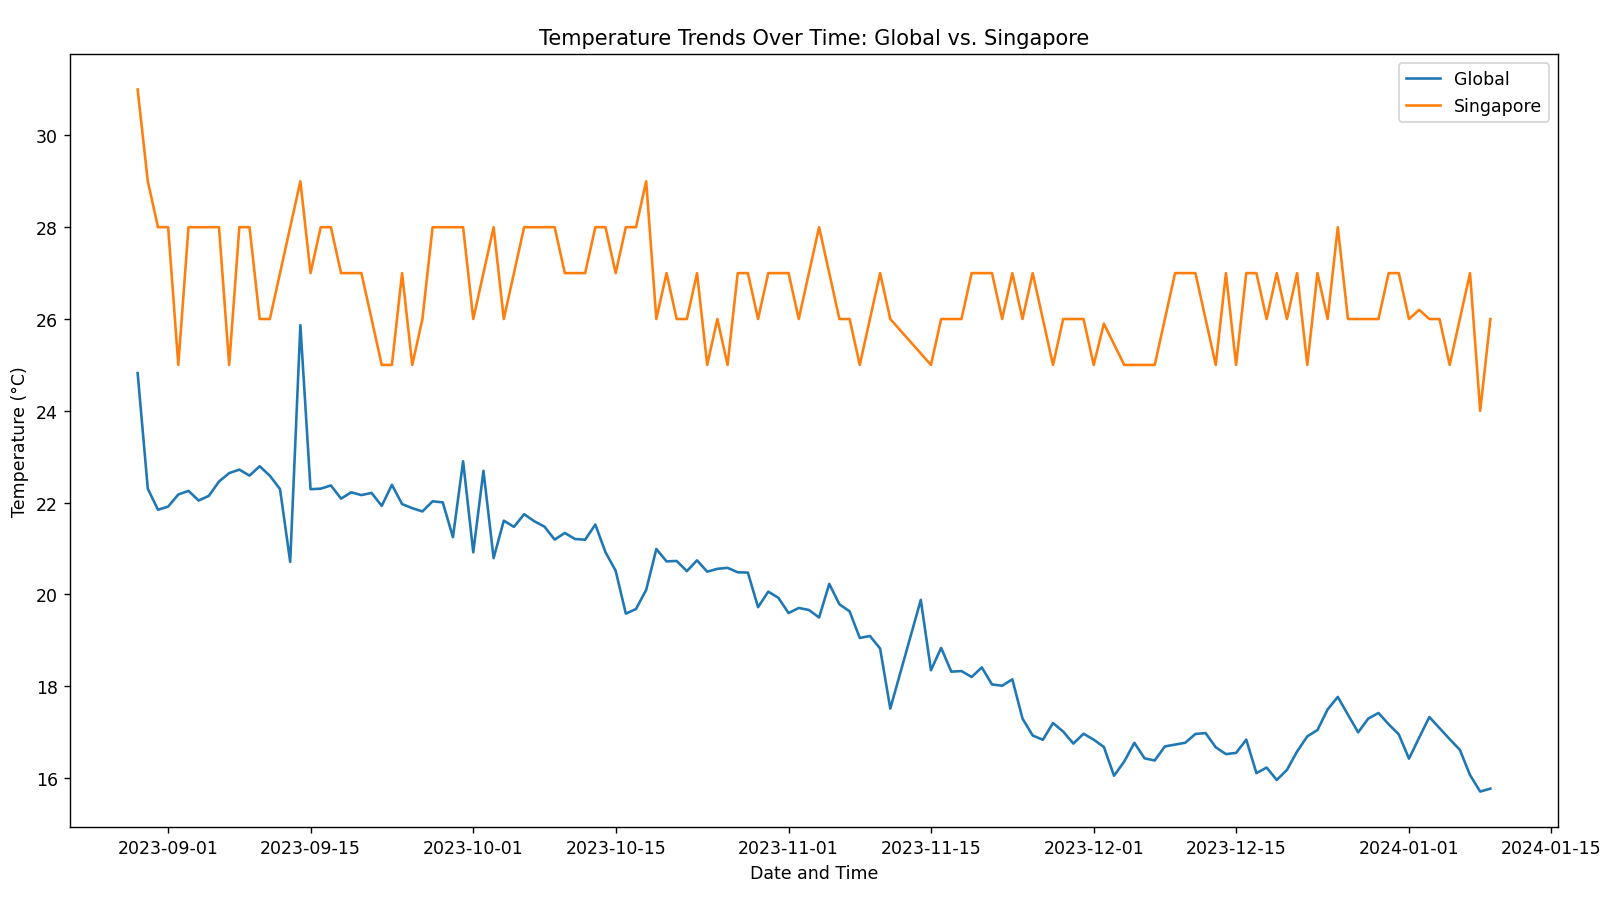
We can observe that:
- Both datasets exhibit fluctuations, indicating a general alignment in temperature patterns during the specified timeframe.
- Temperature of Singapore is more consistent, ranging from 25-32°C whereas Temperature of Global clearly fluctuates over time, ranging from 16-26°C.

------------------------------------

### Time-Series Analysis (TSA)
**Predict Temperature of Global and Singapore for the coming 10 Years**            
Temperature of Global and Singapore for the next 10 years can be predicted using the ARIMA model from ```statsmodels```.                                      
**1) Prepare the Data**
   - Convert to datetime format then extract ```year``` from ```datetime```
   - Extract relevant columns (year and temperature) for time-series
   - Set ```year``` as Index   

In [ ]:
# Convert to datetime format
mean_global_subset['last_updated'] = pd.to_datetime(data['last_updated'], dayfirst=True)
singapore_subset['last_updated'] = pd.to_datetime(data['last_updated'], dayfirst=True)

# Extract Year and Temperature for Time-Series
global_time_series = mean_global_subset[['last_updated', 'temperature_celsius']]
singapore_time_series = singapore_subset[['last_updated', 'temperature_celsius']]

# Set Year column as Index
global_time_series = global_time_series.set_index('last_updated')
singapore_time_series = singapore_time_series.set_index('last_updated')

**2) Figure ARIMA model parameters (p, d & q)**
- **d (Differencing):**                                                                                                    
  Start by figuring out parameter d. Can be done by using Augmented Dickey–Fuller test (ADF) tests.                                            
  Value of d is the number of times needed to difference the series to make it stationary.
  Time series is stationary when value of p ≤ 0.05.
  ADF test can be done by importing ```from statsmodels.tsa.stattools import adfuller```. 

In [ ]:
    from statsmodels.tsa.stattools import adfuller
    
    # Apply ADF test to figure out value of 'd'
    result = adfuller(global_time_series)
    # Extract the test statistic and p-value
    test_statistic = result[0]
    p_value = result[1]
    print(f'Test Statistic: {test_statistic}')
    print(f'P-value: {p_value}')
    # Check for stationarity
    if p_value <= 0.05:
    print('The time series is likely stationary.')
    else:
    print('The time series is likely non-stationary.')

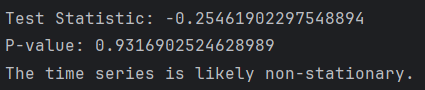                                                         
Notice that p-value is > 0.05, hence have to apply differencing until p ≤ 0.05.

In [ ]:
# Apply Differencing 
differenced_data = global_time_series.diff().dropna()
# Perform ADF test on the differenced data
result_diff = adfuller(differenced_data)
test_statistic_diff = result_diff[0]
p_value_diff = result_diff[1]
print(f'Test Statistic (after differencing): {test_statistic_diff}')
print(f'P-value (after differencing): {p_value_diff}')
# Check for stationarity after differencing
if p_value_diff <= 0.05:
print('The differenced time series is likely stationary.')
else:
print('The differenced time series is likely non-stationary.')

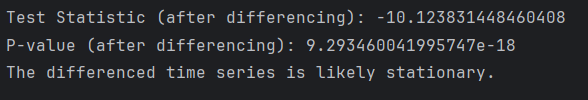
  Therefore, we can conclude that d=1 for Global, then repeat the same steps for Singapore to find value of d for Singapore, which is d=0.

- **q (Moving Average):**                                                                                                    
  After Differencing, Plot Autocorrelation Function (ACF) graph and interpret.
  Look for the highest significant spike after the initial decay (x=0), that exceeds the threshold.
  Value of q = value of x which has the highest significant spike.

In [ ]:
    from statsmodels.graphics.tsaplots import plot_acf
    
    # Plot ACF
    differenced_series = global_time_series.diff().dropna()
    plot_acf(differenced_series['temperature_celsius'], lags=40)
    plt.title('Autocorrelation Function (ACF) for Differenced Time Series')
    plt.show()

**ACF (Global):**
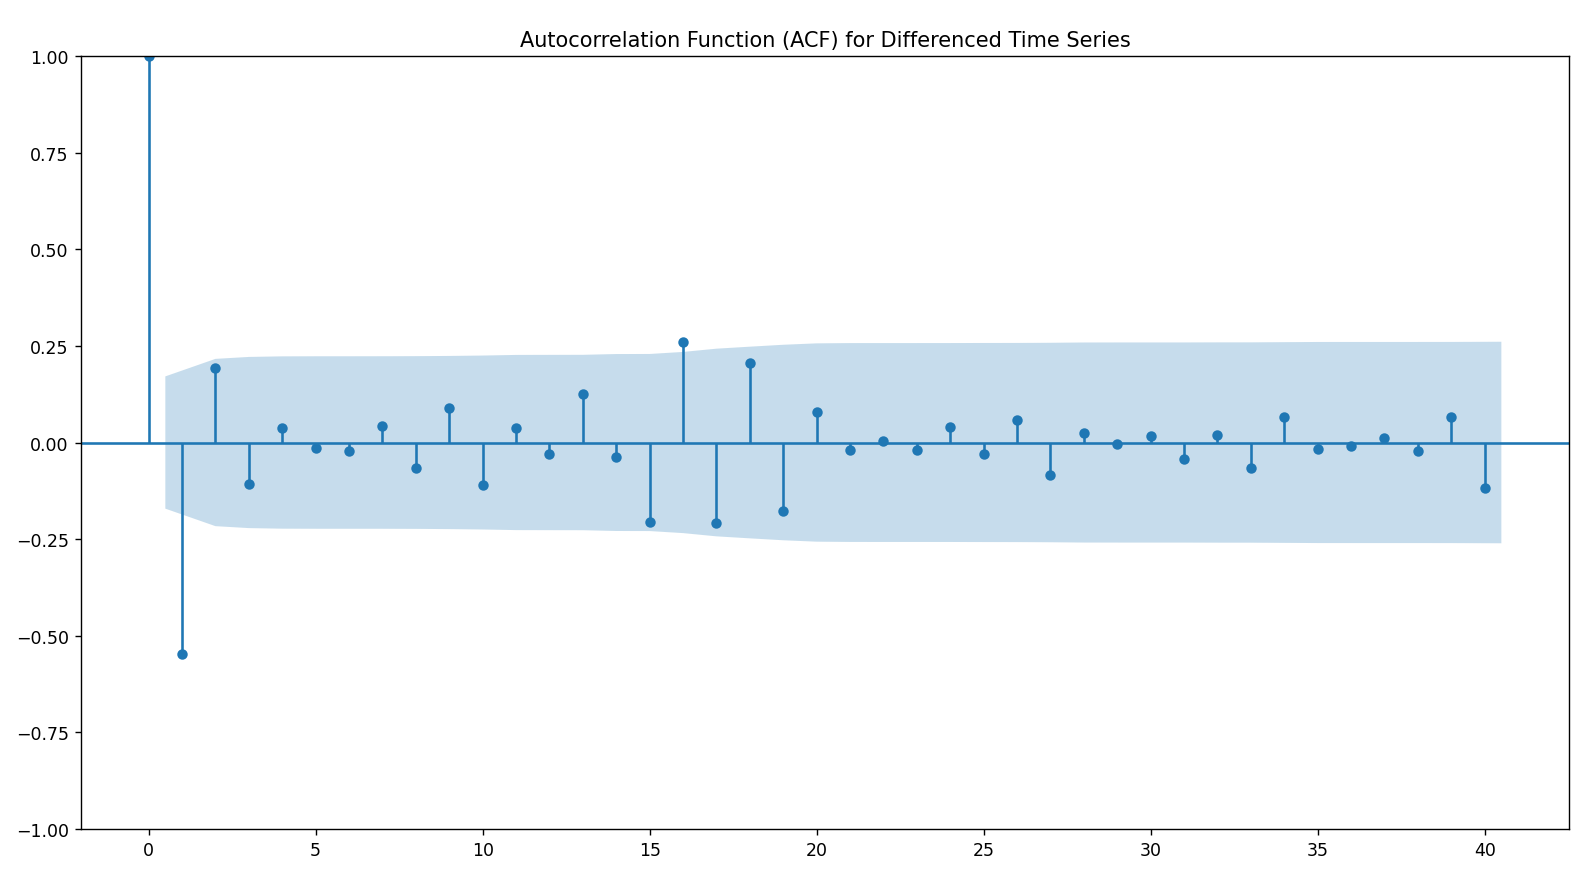
Notice that x=1 has the highest spike which exceeds the threshold therefore, q=x=1 for Global.

**ACF (Singapore):**
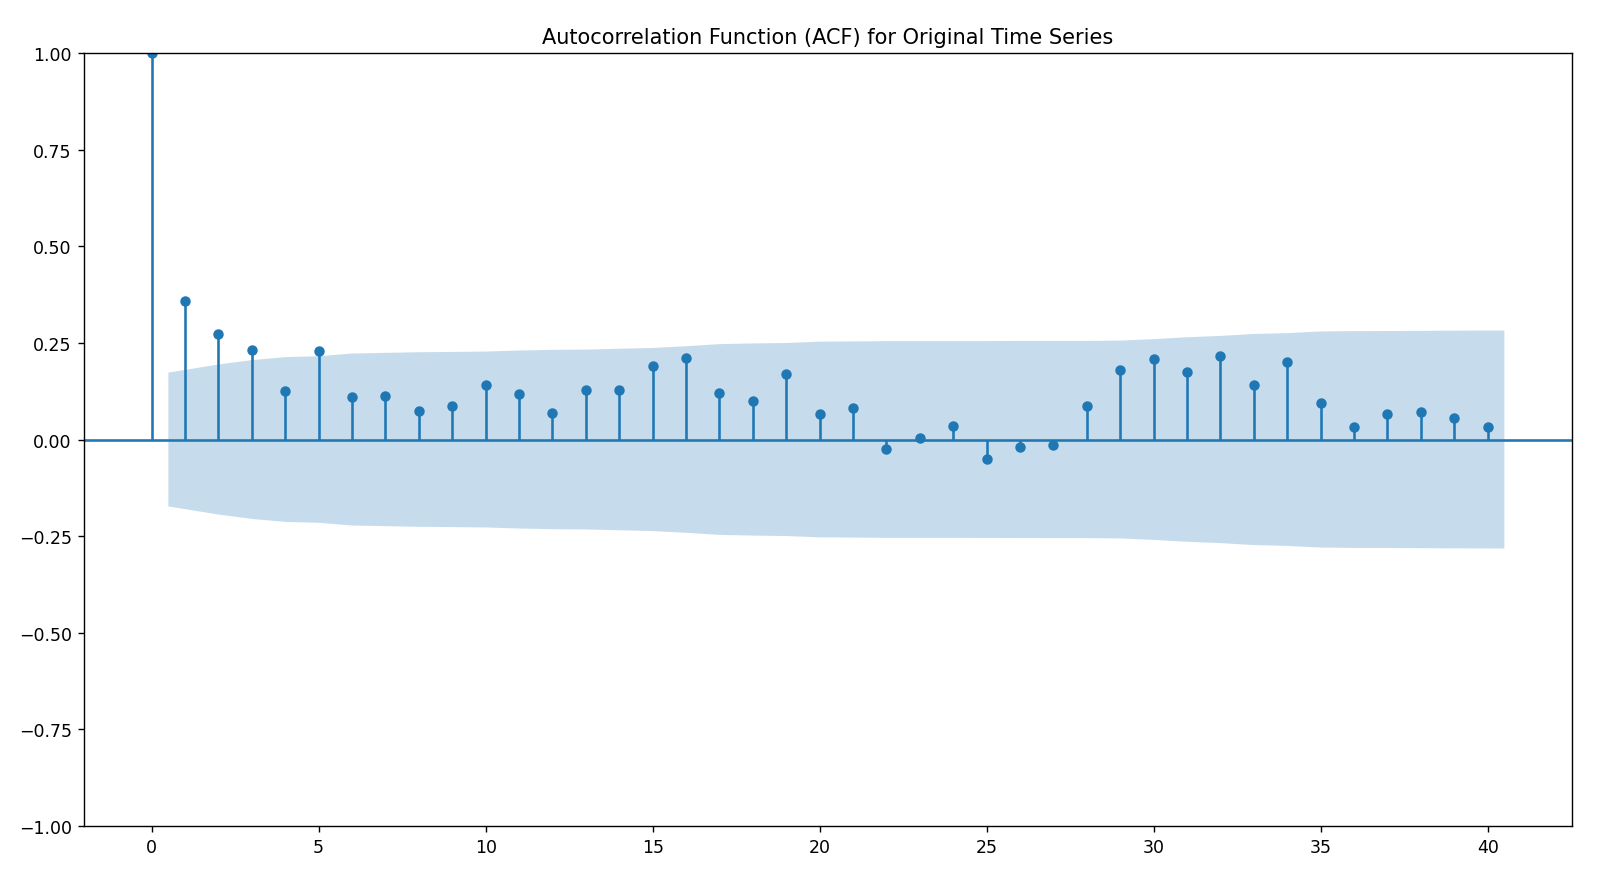
Similarly, x=1 has the highest spike which exceeds the threshold therefore, q=x=1 for Singapore.

- **p (Lag):**                                                                                                    
  Same as finding q. After Differencing, Plot Partial Autocorrelation Function (ACF) graph and interpret.
  Look for the highest significant spike after the initial decay (x=0), that exceeds the threshold.
  Value of p = value of x which has the highest significant spike.

In [ ]:
    from statsmodels.graphics.tsaplots import plot_pacf
    
    # Plot PACF
    differenced_series = global_time_series.diff().dropna()
    plot_acf(differenced_series['temperature_celsius'], lags=40)
    plt.title('Partial Autocorrelation Function (PACF) for Differenced Time Series')
    plt.show()

**PACF (Global):**
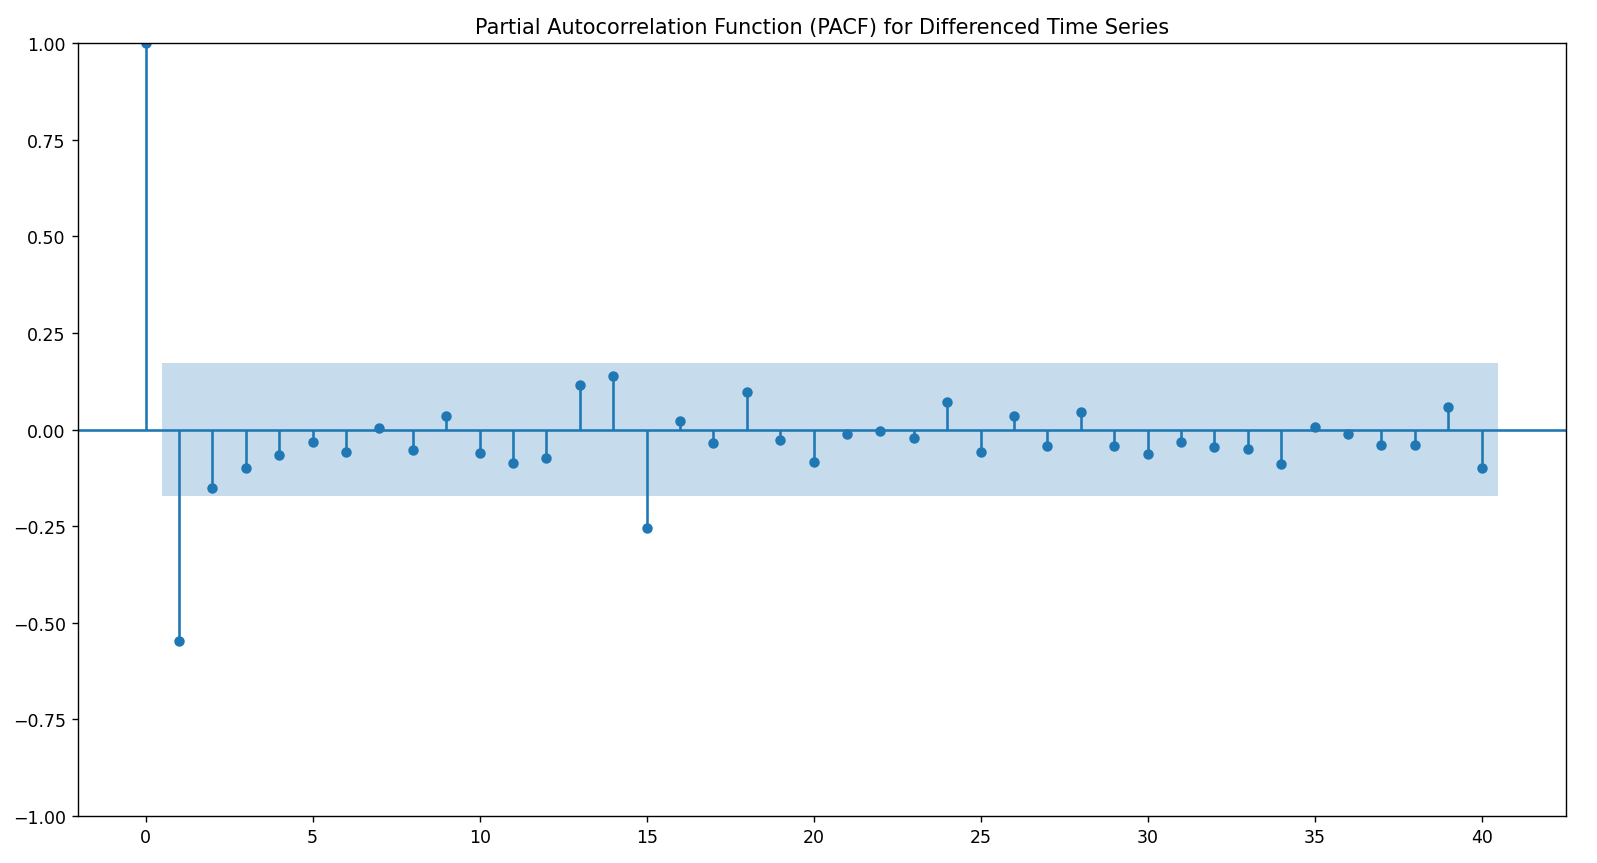
It is observed that x=1 has the highest spike which exceeds the threshold therefore, p=x=1 for Global.

**PACF (Singapore):**
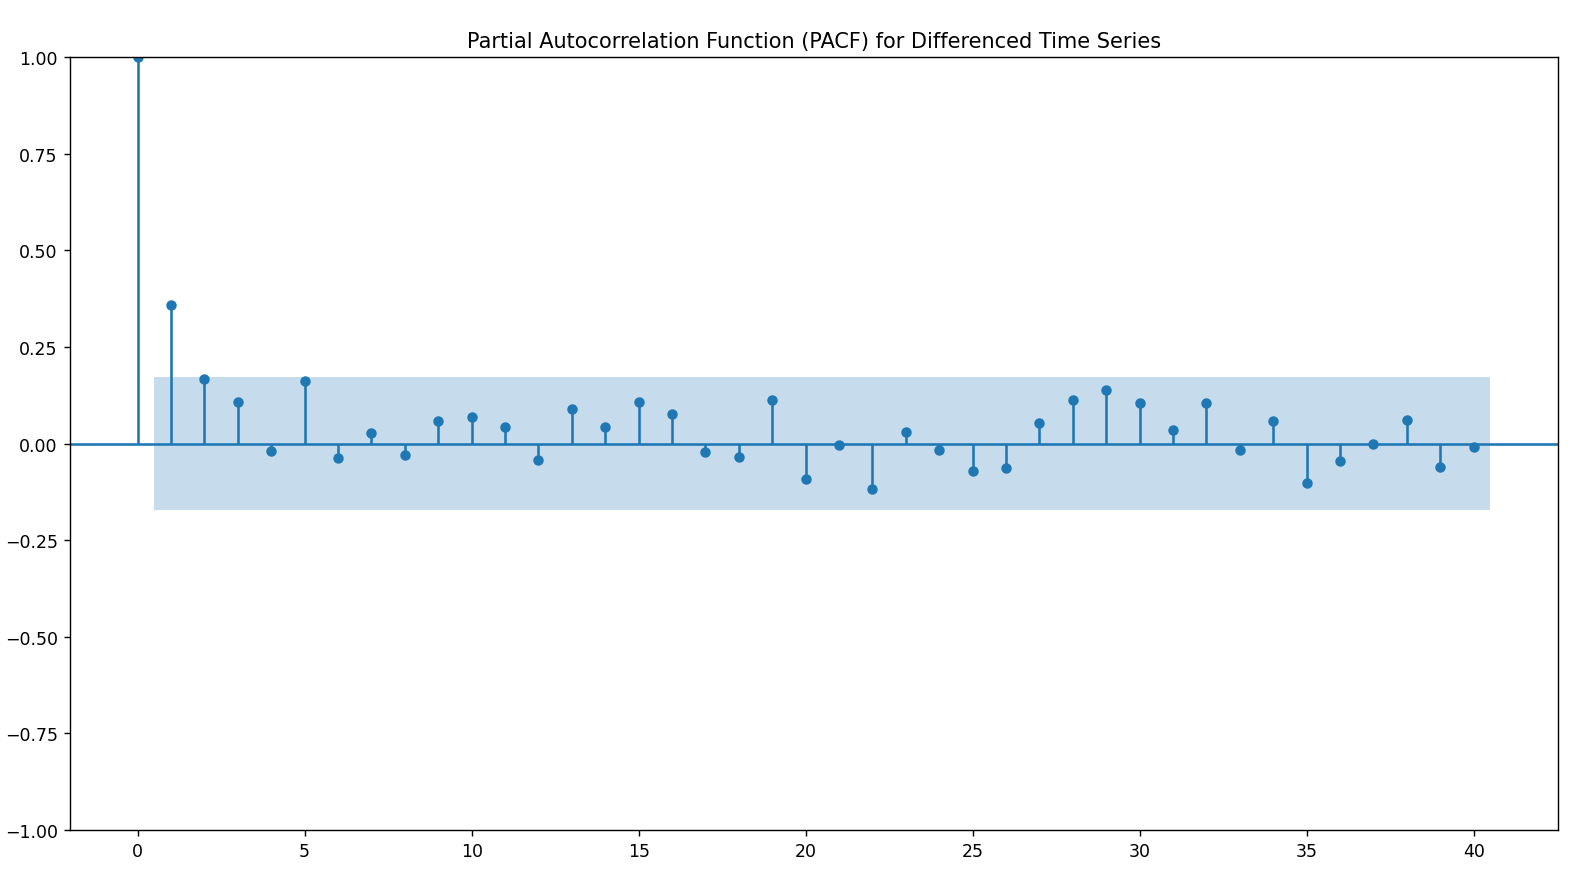
     Same as Global, x=1 has the highest spike which exceeds the threshold therefore, p=x=1 for Singapore.
  - **Values of p, d & q for Global and Singapore**
    - p = 1 for both Global and Singapore
    - d = 1 for Global and d = 0 for Singapore
    - q = 1 for both Global and Singapore

**3) Visualize Results**
- **Fit ARIMA model**
  Since we have obtained p, d and q values for both Global and Singapore, we can now fit the ARIMA model.

In [ ]:
     #Fit ARIMA model for Global temperature
     global_model = ARIMA(global_time_series, order=(1, 1, 1))
     global_result = global_model.fit()

     # Fit ARIMA model for Singapore temperature
     singapore_model = ARIMA(singapore_time_series, order=(1, 0, 1))
     singapore_result = singapore_model.fit()

  - **Predict Future Temperature**

In [ ]:
    # Predict Future Temperature for Global (2024-2034)
    future_years = pd.date_range(start='2024-01-01', periods=10, freq='Y')
    global_forecast = global_result.get_forecast(steps=len(future_years))
    global_forecast_mean = global_forecast.predicted_mean
    
    # Predict Future Temperature for Singapore (2024-2034)
    singapore_forecast = singapore_result.get_forecast(steps=len(future_years))
    singapore_forecast_mean = singapore_forecast.predicted_mean

```forecast_mean``` contains the predicted temperature for the next 10 years.
- **Visualize Results**

In [ ]:
# Plotting predicted temperature trends for Global (2024-2034)
plt.figure(figsize=(14, 6))
plt.plot(future_years, global_forecast_mean, label='Global (Predicted)')
plt.legend()
plt.title('Predicted Temperature Trends for Global: 2024 to 2034')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.show()

# Plotting predicted temperature trends for Singapore (2024-2034)
plt.figure(figsize=(14, 6))
plt.plot(future_years, singapore_forecast_mean, label='Singapore (Predicted)', color='orange')
plt.legend()
plt.title('Predicted Temperature Trends for Singapore: 2024 to 2034')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.show()

**Temperature Trend (Global):**
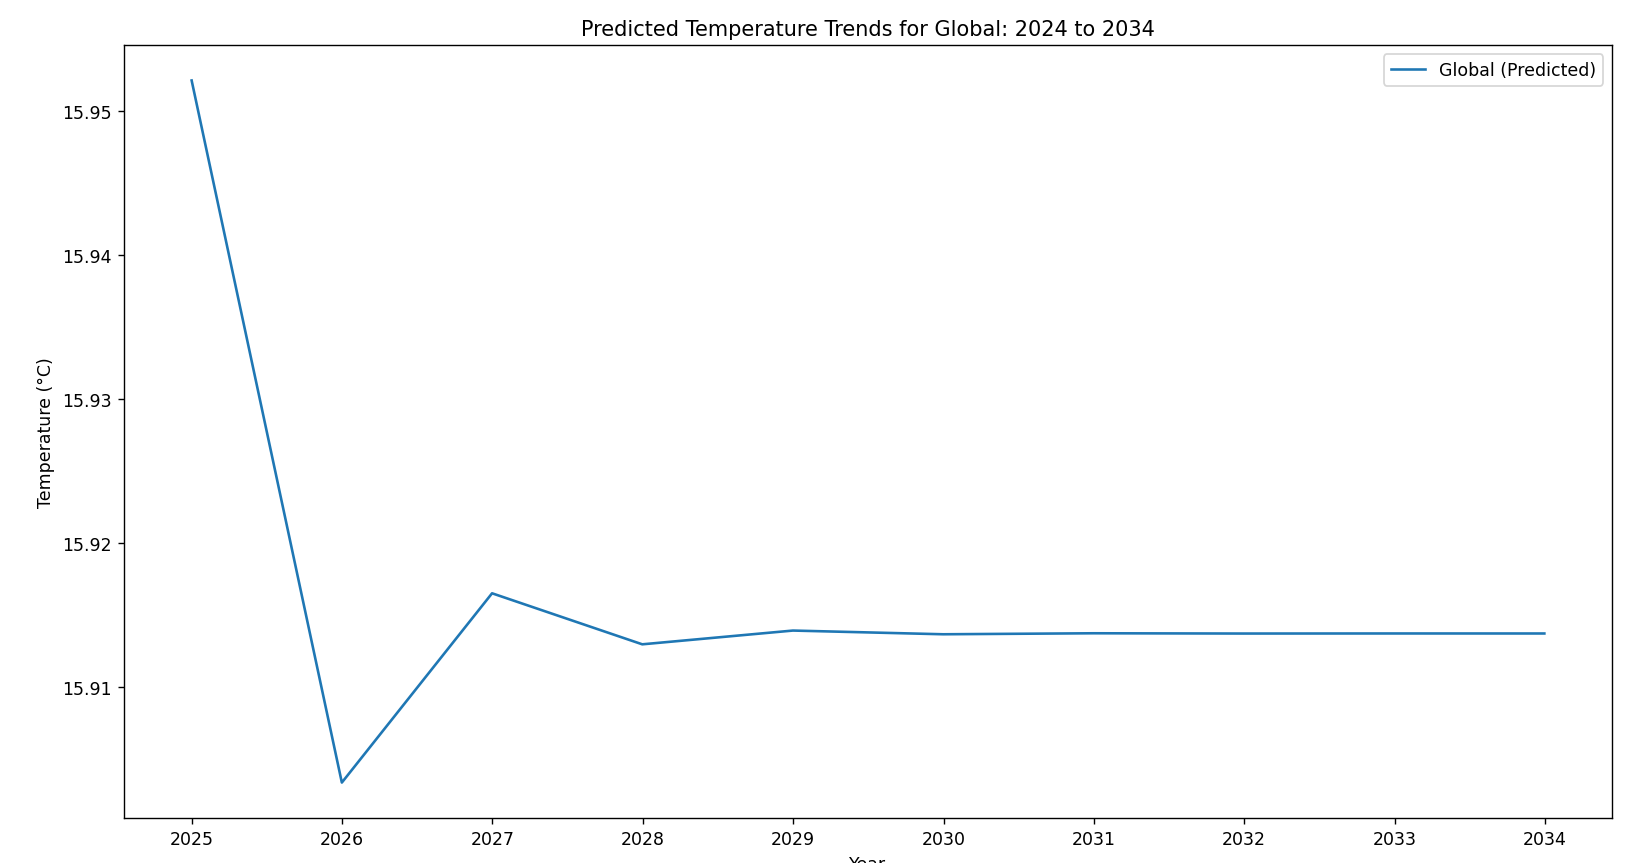

**Temperature Trend (Singapore):**
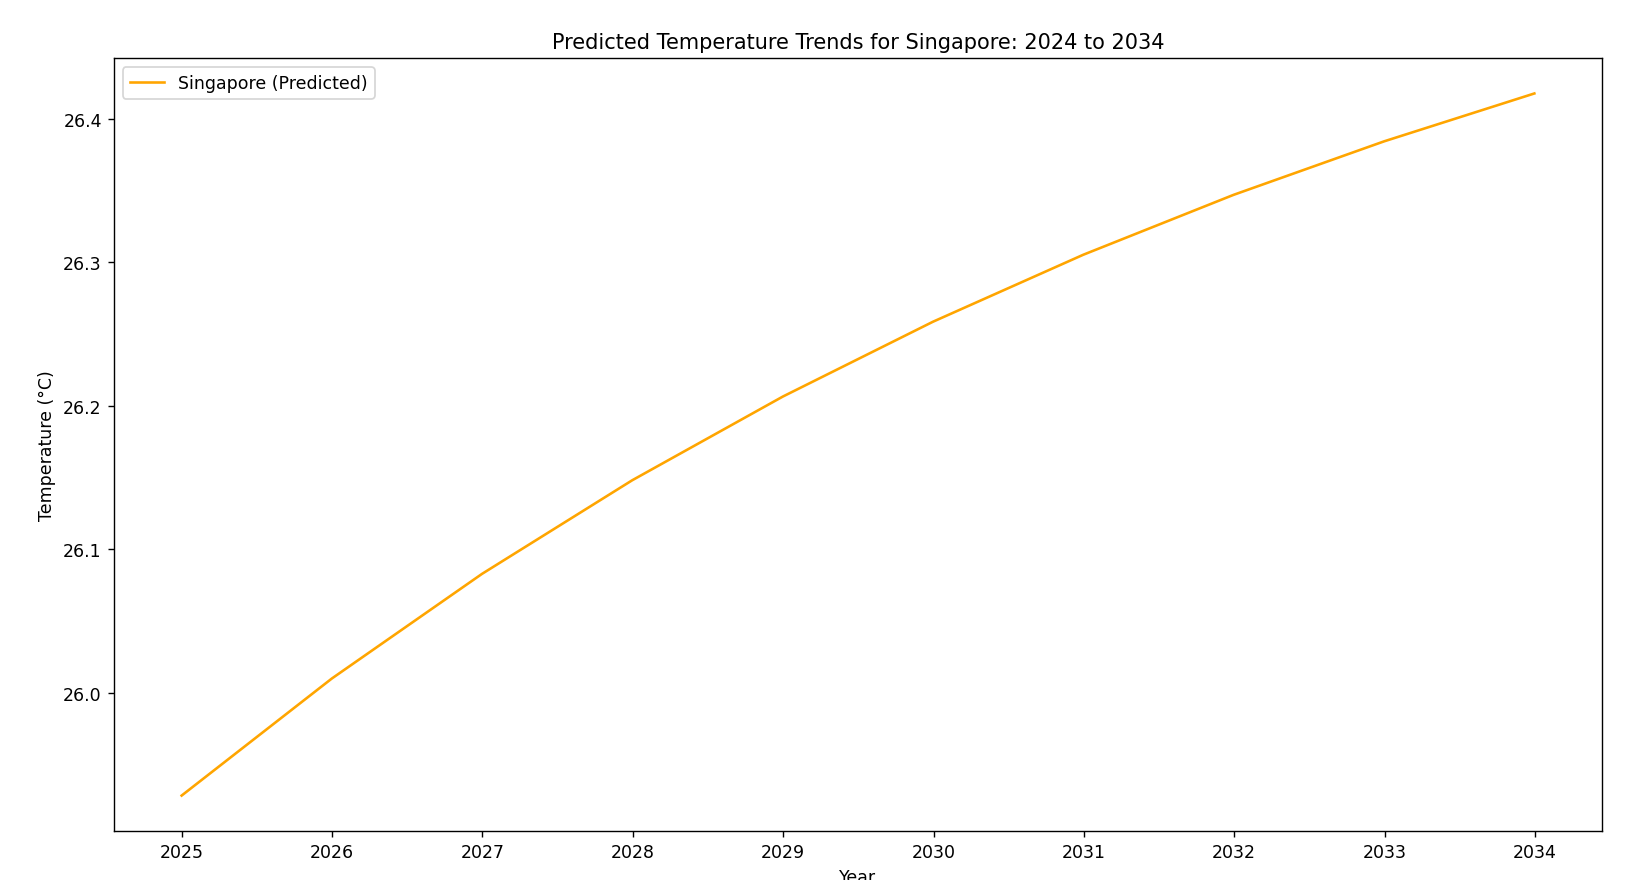


------------------------------------
**Conclusion:**                                                                                                                                    
In conjunction with the detailed analysis of temperature trends over the past decade for both global locations and Singapore, the identified patterns align seamlessly with the outcomes derived from the correlation analysis of environmental factors. The distinctive climate patterns observed in global locations, characterized by fluctuations and subtle shifts in temperature over the years, are mirrored in the time-series analysis. Specifically, the global temperature exhibited nuanced changes, including a decrease from 2025 to 2026, a slight increase from 2026 to 2027, a marginal decline from 2027 to 2028, a very subtle rise from 2028 to 2029, and relative stability thereafter.

On the other hand, the temperature trends in Singapore, as identified in the time-series analysis, showcased a consistent upward trajectory, albeit at a decreasing rate. This persistent rise in temperatures in Singapore resonates with the established climate patterns typical of the region, indicative of the stability of its tropical climate.

Moreover, the correlation analysis reinforces the stability of Singapore's climate by revealing a more consistent relationship between its temperature and other environmental factors. The narrower temperature range and more stable correlations in Singapore stand in contrast to the global scale, where the correlation heatmap highlights intricate relationships contributing to the observed temperature variability.

The holistic approach employed in this analysis, considering both temperature trends and environmental factor correlations, enhances our understanding of regional and global climate behaviors. This comprehensive perspective underscores the significance of interconnected environmental factors when interpreting temperature trends, providing valuable insights for informed climate analysis, adaptation strategies, and policy planning on both local and global scales. By integrating these multifaceted analyses, a better comprehension of the intricate dynamics of climate change emerges, paving the way for more effective and targeted interventions in the face of evolving environmental conditions.